# Models

# Table of contents:
* 1 [Preparation](#intro-bullet)
* 2 [Logistic Regression](#first-bullet)
* 3 [Random Forest](#second-bullet)
* 3 [Balanced Random Forest](#third-bullet)
* 4 [Naive Bayes](#fourth-bullet)
* 5 [KNN](#fifth-bullet)
* 6 [Decision Tree](#sixth-bullet)
* 7 [Stacking](#seventh-bullet)
* 8 [Boosting](#eigth-bullet)
    * 8.1 [LigthGBM](#nineth-bullet)
    * 8.2 [Gradient Boosting](#tenth-bullet)
    * 8.3 [Histogram Gradient Boosting 1](#eleventh-bullet)
    * 8.4 [Histogram Gradient Boosting 2](#12-bullet)
* 9 [Bagging](#13-bullet)

## 1. Preparation <a class="anchor" id="intro-bullet"></a>

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline

In [8]:
tmp_data = pd.read_csv("./featureData.csv")
# split into train test sets
train_data, test_data = train_test_split(tmp_data,test_size=0.2)

test_data.reset_index(inplace = True, drop = True)
train_data.reset_index(inplace = True, drop = True)


In [9]:
test_data=test_data.drop(columns='Unnamed: 0')
train_data=train_data.drop(columns='Unnamed: 0')

In [10]:
test_data.head()
    

,SK_ID_CURR,TARGET,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,...,BureauMin_bureau_STATUS_3_count_mean_norm,BureauMin_bureau_STATUS_4_count_mean_norm,BureauMin_bureau_STATUS_5_count_mean_norm,BureauMin_bureau_STATUS_C_count_mean_norm,BureauMin_bureau_STATUS_X_count_mean_norm,DAYS_EMPLOYED_PERC,INCOME_CREDIT_PERC,INCOME_PER_PERSON,ANNUITY_INCOME_PERC,PAYMENT_RATE
0,185409,0,9514,910.0,6271.0,2197,1,2,2,1,...,0.304721,0.304721,0.304721,0.304721,0.304721,0.095649,0.162999,252000.0,0.176339,0.028743
1,205983,0,19143,5101.0,2711.0,2621,1,3,3,0,...,0.304721,0.304721,0.304721,0.304721,0.304721,0.266468,0.450751,121500.0,0.158852,0.071603
2,430183,0,15222,2138.0,6928.0,4675,1,2,2,0,...,0.304721,0.304721,0.304721,0.304721,0.304721,0.140455,0.134072,90000.0,0.205583,0.027563
3,200740,1,14418,2230.0,4711.0,286,1,2,2,0,...,0.294599,0.294599,0.294599,0.294599,0.294599,0.154668,0.200000,135000.0,0.221200,0.044240
4,190706,0,20066,12888.0,13021.0,3134,1,2,2,0,...,0.123264,0.123264,0.123264,0.123264,0.123264,0.642280,0.469043,45000.0,0.209100,0.098077


## 2. Logistic Regression <a class="anchor" id="first-bullet"></a>

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
def LogRegModel(train, test):
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    # Make the model with the specified regularization parameter
    log_reg = LogisticRegression(C = 0.0001)
    # Train on the training data
    log_reg.fit(train, labels)
    # Select only second column(TARGET)
    log_reg_pred = log_reg.predict_proba(test)[:, 1]
    tescik = log_reg.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, log_reg_pred))
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, log_reg_pred)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


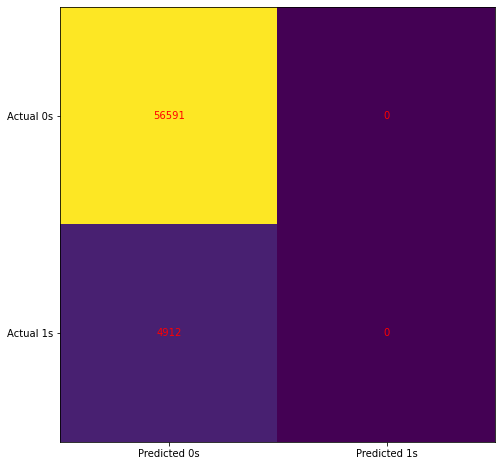

Train/Test split results:
ROC 0.6324377697976515
F1 score: 0.000000


In [12]:
LogRegScore = LogRegModel(train_data,test_data)

## 3. Random Forest <a class="anchor" id="second-bullet"></a>

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

def RanForModel(train,test):
    rf = RandomForestClassifier(n_estimators=100,
                                max_depth=10,min_samples_split=20,
                                min_samples_leaf=6,
                                max_features='auto')
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    
    rf.fit(X = train, y = labels)
    # Select only second column(TARGET)
    ran_for_pred = rf.predict_proba(test)[:, 1]
    
    tescik = rf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('F1 score: %f' % f1)
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, ran_for_pred))
    return roc_auc_score(test_labels, ran_for_pred)
   


In [ ]:
RandForScore = RanForModel(train_data,test_data)

## 4. Balanced Random Forest <a class="anchor" id="third-bullet"></a>

In [ ]:
from imblearn.ensemble import BalancedRandomForestClassifier

def imbalancedRanFor(train,test):
    rf = BalancedRandomForestClassifier()
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET'])
    test= test.drop(columns = ['TARGET'])
    
    rf.fit(X = train, y = labels)
    # Select only second column(TARGET)
    ran_for_pred = rf.predict_proba(test)[:, 1]
    
    tescik = rf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('F1 score: %f' % f1)
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, ran_for_pred))
    return roc_auc_score(test_labels, ran_for_pred)

In [ ]:
imbRanFor =imbalancedRanFor(train_data,test_data)

## 5. Naive Bayesian<a class="anchor" id="fourth-bullet"></a>

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score

def NaiveBayModel(train,test):
    
    
    clf = BernoulliNB()
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    clf.fit(X = train, y = labels)
    clf_pred = clf.predict_proba(test)[:, 1]
    tescik = clf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, clf_pred))
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, clf_pred)
  


In [ ]:
NaiveScore = NaiveBayModel(train_data,test_data)

## 6. K-Nearest Neighbors <a class="anchor" id="fifth-bullet"></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

def KNNModel(train,test):
    
    
    clf = KNeighborsClassifier(n_neighbors=3)
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    clf.fit(X = train, y = labels)
    clf_pred = clf.predict_proba(test)[:, 1]
    tescik = clf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, clf_pred))
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, clf_pred)

In [ ]:
knnModel = KNNModel(train_data,test_data)

## 6. Decision Three <a class="anchor" id="sixth-bullet"></a>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
def DTModel(train,test):
    
    
    clf = DecisionTreeClassifier()
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    clf.fit(X = train, y = labels)
    clf_pred = clf.predict_proba(test)[:, 1]
    tescik = clf.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, clf_pred))
    f1 = f1_score(test_labels, tescik)
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, clf_pred)

In [ ]:
DTmodel = DTModel(train_data,test_data)

## 7. Stacking <a class="anchor" id="seventh-bullet"></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from matplotlib import pyplot
def fun2(train, test):
    # define dataset
  
    # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    X = train
    y = labels
    # define the base models
    level0 = list()
    level0.append(('bayes', BernoulliNB()))
    level0.append(('rf',RandomForestClassifier(n_estimators=100,
                                max_depth=10,min_samples_split=20,
                                min_samples_leaf=6,
                                max_features='auto')))
    # define meta learner model
    level1 = LogisticRegression(C = 0.0001)
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=2)
    # fit the model on all available data
    model.fit(X, y)
    # make a prediction for one example
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print("F1 score ", f1)
    return roc_auc_score(test_labels, model_pred)

In [ ]:
StackingScore = fun2(train_data,test_data)

## 8. Boosting <a class="anchor" id="eigth-bullet"></a>

## 8.1 LightGBM <a class="anchor" id="nineth-bullet"></a>

In [ ]:
import lightgbm as lgb
import re
from sklearn.metrics import f1_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

def PlainLightGBM(train,test):
    
     # Extract the ids
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
   
    model = lgb.LGBMClassifier()
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    test = test.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=1)
    n_scores = cross_val_score(model, train, labels, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    
    model.fit(train, labels)
    model_pred = model.predict_proba(test)[:, 1]
   
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
     
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    return roc_auc_score(test_labels, model_pred)

    


In [ ]:
plainLGBMScore=PlainLightGBM(train_data,test_data)

## 8.2 Gradient Boosting  <a class="anchor" id="tenth-bullet"></a>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# make predictions using gradient boosting for classification
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

import re

def myBooster(train,test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    # define dataset
    X = train
    y = labels
    # define the model
    model = GradientBoostingClassifier()
    cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='roc_auc_ovo_weighted', cv=cv, n_jobs=-1, error_score='raise')
    model.fit(X, y)
    # make a prediction for one example
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, model_pred)

## 8.3 Histogram Gradient Boosting  <a class="anchor" id="11th-bullet"></a>

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

def myHistBooster(train, test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    # define dataset
    X = train
    y = labels
    model = HistGradientBoostingClassifier()
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
    
    model.fit(X, y)
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)
    return roc_auc_score(test_labels, model_pred)
    

In [ ]:
Hist1BoosterScore = myHistBooster(train_data,test_data)

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import re 
def myHistBooster2(train, test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    # define dataset
    X = train
    y = labels
    model = HistGradientBoostingClassifier()
    grid = dict()
    grid['learning_rate'] = [0.01, 0.001, 0.1]
    
    grid['max_depth'] = [3, 5 ,7 ]
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
    # define the grid search procedure
    grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score='raise')
    # execute the grid search
    grid_result = grid_search.fit(X, y)
    # summarize the best score and configuration
    print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
    # summarize all scores that were evaluated
    means = grid_result.cv_results_['mean_test_score']
    stds = grid_result.cv_results_['std_test_score']
    params = grid_result.cv_results_['params']
    for mean, stdev, param in zip(means, stds, params):
        print("%f (%f) with: %r" % (mean, stdev, param))

  

In [ ]:
Hist2BoosterScore = myHistBooster2(train_data,test_data)

## 9. Bagging <a class="anchor" id="12th-bullet"></a>

In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection 
from sklearn.ensemble import BaggingClassifier 
def bagging(train, test):
    train_ids = train['SK_ID_CURR']
    test_ids = test['SK_ID_CURR']
    
    # Extract the labels for training
    labels = train['TARGET']
    test_labels = test['TARGET']
    # Remove the ids and target
    train = train.drop(columns = ['TARGET','SK_ID_CURR'])
    test= test.drop(columns = ['TARGET','SK_ID_CURR'])
    train = train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
    
    # define dataset
    X = train
    y = labels
    seed = 1
   
    # initialize the base classifier 
    base_cls = RandomForestClassifier(n_estimators = 100, n_jobs = -1)
     
  
    # no. of base classifier 
    num_trees = 100
  
    # bagging classifier 
    model = BaggingClassifier(base_estimator = base_cls, 
                          random_state = seed,
                             n_jobs=-1) 
    print("hello")
    model.fit(X,y)
    model_pred = model.predict_proba(test)[:,1]
    tescik = model.predict(test)
    f1 = f1_score(test_labels, tescik)
    cm = confusion_matrix(test_labels, tescik)

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.imshow(cm)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
    plt.show()
    
    print('Train/Test split results:')
    print("ROC",  roc_auc_score(test_labels, model_pred))
    print('F1 score: %f' % f1)

In [ ]:
BagginScore=bagging(train_data,test_data)